In [1]:
!pip install pyspark

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MovieRatingAnalyzing").getOrCreate()

In [5]:
df = spark.read.csv("/popular_movies.csv", header=True, inferSchema=True)

In [6]:
df.show()

+--------------------+---------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+
|               title|   budget|              genres|original_language|            overview|          popularity|         poster_path|        release_date|             revenue|             runtime|    spoken_languages|        vote_average|vote_count|production_companies|production_countries|
+--------------------+---------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+
|Final Destination...| 50000000|[{'id': 27, 'name...|               en|Plagued by a viol...|           1179.7021|/6WxhEvF

In [9]:
df.orderBy(df['vote_average'].desc()).select('title', 'vote_average').show(10)

+--------------------+--------------------+
|               title|        vote_average|
+--------------------+--------------------+
| A parody of Aim ...|[{'iso_3166_1': '...|
| Will the Empire ...|[{'iso_3166_1': '...|
| The bandits want...|[{'iso_3166_1': '...|
| Inspired by the ...|[{'iso_3166_1': '...|
| On the way back ...|[{'id': 79044, 'l...|
| On the way back ...|[{'id': 79044, 'l...|
|    The Red Envelope|[{'english_name':...|
|GThai Movie 3: Th...|[{'english_name':...|
|              Tubero|[{'english_name':...|
|Beck 52 - The Inv...|[{'english_name':...|
+--------------------+--------------------+
only showing top 10 rows



In [10]:
df.groupBy('genres').count().orderBy('count', ascending=False).show()

+--------------------+-----+
|              genres|count|
+--------------------+-----+
|[{'id': 18, 'name...|  651|
|[{'id': 35, 'name...|  320|
|[{'id': 18, 'name...|  319|
|[{'id': 27, 'name...|  231|
|[{'id': 27, 'name...|  211|
|[{'id': 99, 'name...|  202|
|                  []|  161|
|[{'id': 35, 'name...|  153|
|[{'id': 35, 'name...|  142|
|[{'id': 10749, 'n...|  128|
|[{'id': 28, 'name...|  114|
|[{'id': 18, 'name...|   98|
|[{'id': 28, 'name...|   98|
|[{'id': 18, 'name...|   91|
|[{'id': 10749, 'n...|   86|
|[{'id': 35, 'name...|   76|
|[{'id': 27, 'name...|   75|
|[{'id': 10749, 'n...|   74|
|[{'id': 28, 'name...|   71|
|[{'id': 18, 'name...|   70|
+--------------------+-----+
only showing top 20 rows



In [11]:
df.agg({'vote_average': 'avg'}).show()

+------------------+
| avg(vote_average)|
+------------------+
|214658.26542275742|
+------------------+



In [13]:
df.orderBy(df['vote_count'].desc()).select('title', 'vote_count').show(5)

+--------------------+--------------------+
|               title|          vote_count|
+--------------------+--------------------+
| On the way back ...|[{'iso_3166_1': '...|
| On the way back ...|[{'iso_3166_1': '...|
|   Samrat Prithviraj|[{'english_name':...|
|      Captain Miller|[{'english_name':...|
|            Maharaja|[{'english_name':...|
+--------------------+--------------------+
only showing top 5 rows



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
top_votes_df = df.orderBy(df['vote_count'].desc()).select('title', 'vote_count').limit(10)

In [16]:
top_votes_pd = top_votes_df.toPandas()

/tmp/ipython-input-19-1685983895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_votes_pd, x='title', y='vote_count', palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI L

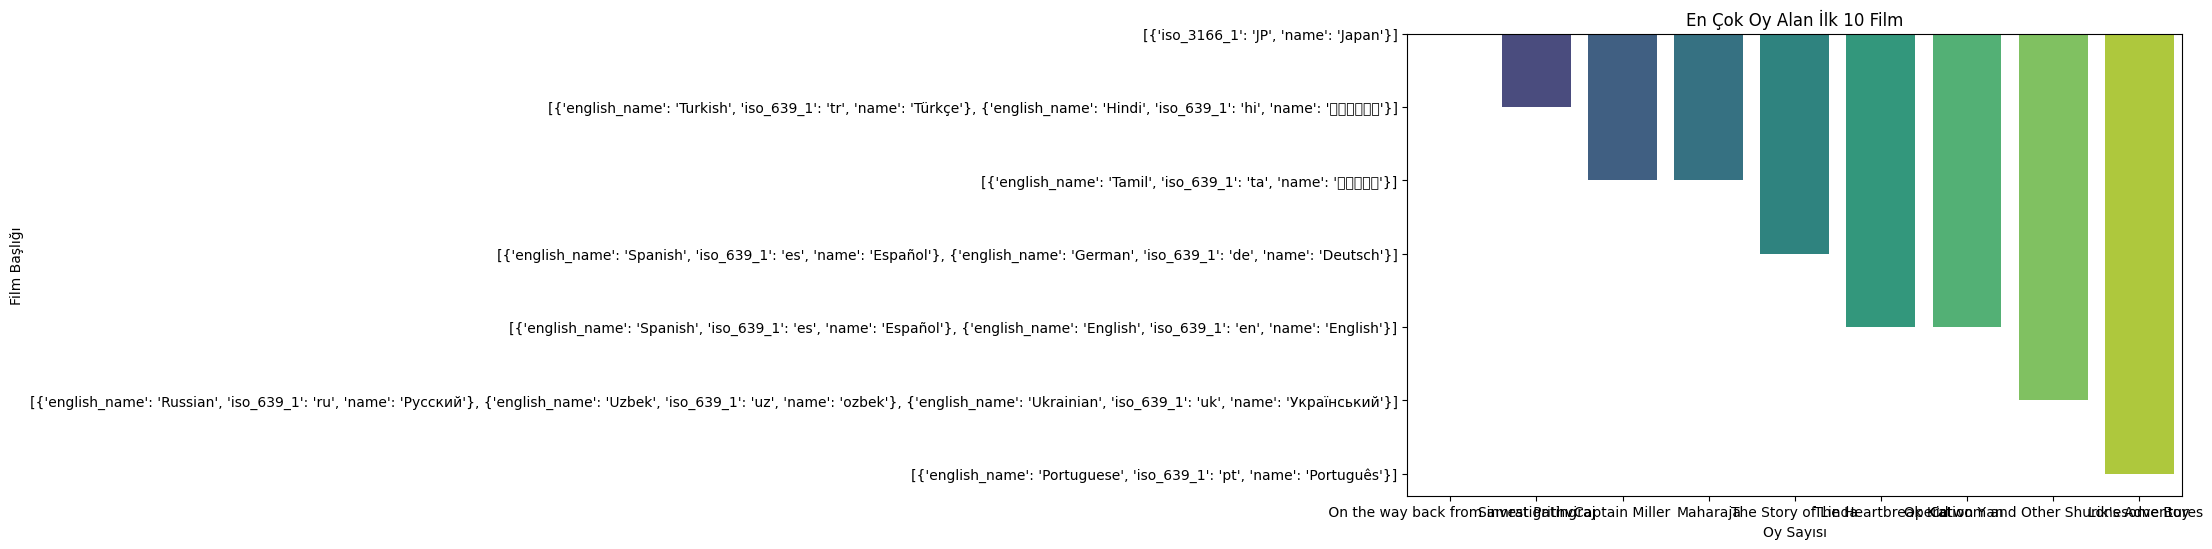

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_votes_pd, x='title', y='vote_count', palette='viridis')
plt.title('En Çok Oy Alan İlk 10 Film')
plt.xlabel('Oy Sayısı')
plt.ylabel('Film Başlığı')
plt.show()

In [20]:
from pyspark.sql.functions import explode, split, trim

# 'genres' sütununu virgül ile böler ve her türü ayrı satıra dönüştürür
df_genres = df.withColumn("genre", explode(split(df["genres"], ",")))

# Gereksiz boşlukları temizler
df_genres = df_genres.withColumn("genre", trim(df_genres["genre"]))

# Tür bazında film sayısı
genre_counts = df_genres.groupBy("genre").count().orderBy("count", ascending=False)

genre_counts.show()


+--------------------+-----+
|               genre|count|
+--------------------+-----+
|    'name': 'Drama'}| 2348|
|   'name': 'Action'}| 2336|
|           {'id': 18| 2046|
|          [{'id': 18| 2035|
|           {'id': 53| 2005|
|   'name': 'Comedy'}| 1820|
|   'name': 'Drama'}]| 1733|
|          [{'id': 28| 1640|
|           {'id': 35| 1531|
|'name': 'Thriller'}]| 1458|
|'name': 'Adventure'}| 1398|
|           {'id': 12| 1292|
|          [{'id': 35| 1238|
|        {'id': 10749| 1174|
|           {'id': 28| 1166|
|'name': 'Animation'}| 1098|
|           {'id': 14| 1048|
|           {'id': 80| 1012|
| 'name': 'Thriller'}|  988|
| 'name': 'Romance'}]|  982|
+--------------------+-----+
only showing top 20 rows



In [21]:
genre_counts_pd = genre_counts.toPandas()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-23-3299291036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=genre_counts_pd.head(15), palette='magma')


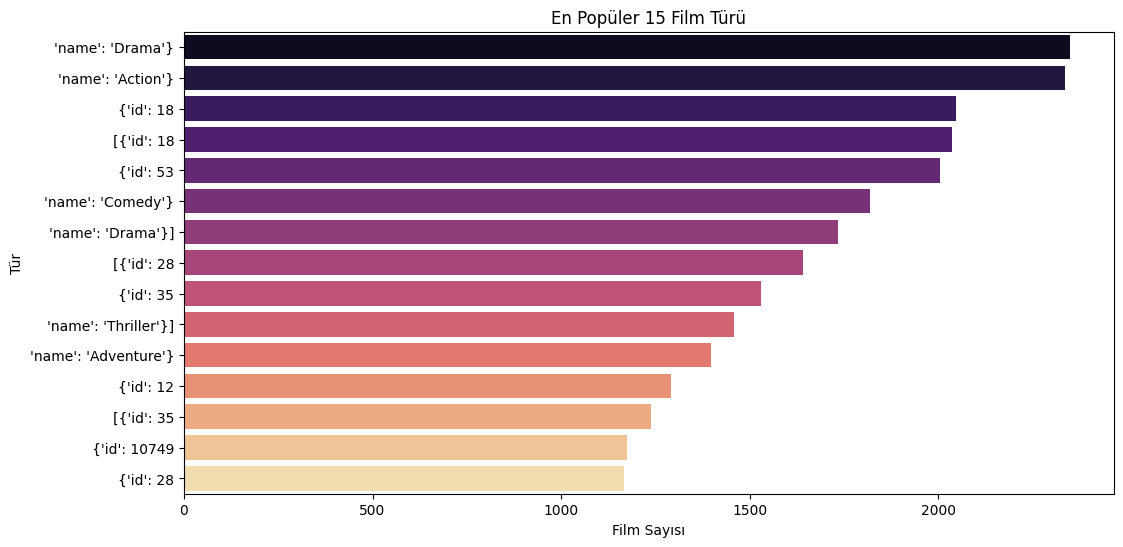

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='genre', data=genre_counts_pd.head(15), palette='magma')
plt.title('En Popüler 15 Film Türü')
plt.xlabel('Film Sayısı')
plt.ylabel('Tür')
plt.show()

In [24]:
genre_counts.show(50)

+--------------------+-----+
|               genre|count|
+--------------------+-----+
|    'name': 'Drama'}| 2348|
|   'name': 'Action'}| 2336|
|           {'id': 18| 2046|
|          [{'id': 18| 2035|
|           {'id': 53| 2005|
|   'name': 'Comedy'}| 1820|
|   'name': 'Drama'}]| 1733|
|          [{'id': 28| 1640|
|           {'id': 35| 1531|
|'name': 'Thriller'}]| 1458|
|'name': 'Adventure'}| 1398|
|           {'id': 12| 1292|
|          [{'id': 35| 1238|
|        {'id': 10749| 1174|
|           {'id': 28| 1166|
|'name': 'Animation'}| 1098|
|           {'id': 14| 1048|
|           {'id': 80| 1012|
| 'name': 'Thriller'}|  988|
| 'name': 'Romance'}]|  982|
|  'name': 'Comedy'}]|  949|
|          [{'id': 27|  935|
|   'name': 'Horror'}|  930|
|    'name': 'Crime'}|  908|
|          {'id': 878|  900|
|        {'id': 10751|  848|
|          [{'id': 16|  787|
|  'name': 'Fantasy'}|  743|
|   'name': 'Family'}|  698|
|         {'id': 9648|  672|
|'name': 'Science ...|  656|
|  'name': 'Ro

In [26]:
from pyspark.sql.functions import regexp_extract

cleaned_df = df_genres.filter(df_genres.genre.rlike("^[A-Za-z ]+$"))


In [27]:
genre_counts_cleaned = cleaned_df.groupBy("genre").count().orderBy("count", ascending=False)
genre_counts_cleaned.show()

+--------------------+-----+
|               genre|count|
+--------------------+-----+
|the visitor visit...|    1|
+--------------------+-----+



/tmp/ipython-input-28-3299291036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=genre_counts_pd.head(15), palette='magma')


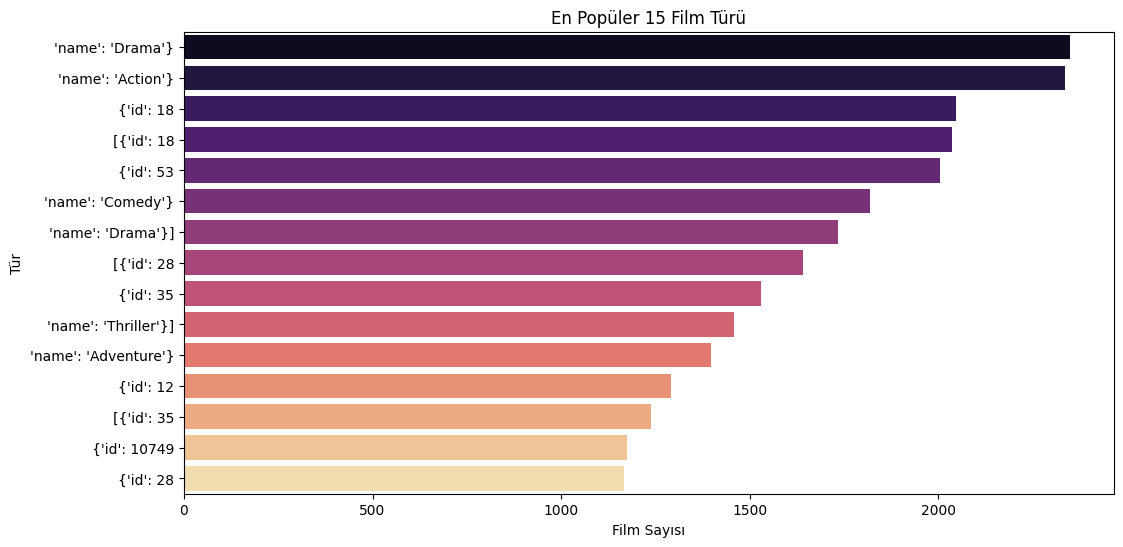

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='genre', data=genre_counts_pd.head(15), palette='magma')
plt.title('En Popüler 15 Film Türü')
plt.xlabel('Film Sayısı')
plt.ylabel('Tür')
plt.show()